# Формирование модели монетизации

### Введение**:**

Аналитик помогает бизнесу выбрать оптимальное время для запуска рекламы. Зная расходы на продвижение игры, необходимо рассчитать её окупаемость при разных сценариях 

Пока планируется показывать её на экране выбором постройки.

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». Помимо основного датасета есть два датасета с информацией о рекламных активностях.

### Задача**:**

Сформируйте модель монетизации игрового приложения.

Многие игры зарабатывают с помощью рекламы. И все они сталкиваются с противоречием:

- Пользователь разозлится и уйдёт, если начать показывать ему рекламу раньше, чем игра его затянет.
- Но  чем позже создатели игры включат рекламу, тем меньше они заработают.

### Декомпозиция**:**

- Введение
- Шаг 1. Загрузка датасетов. Изучение общей информации;
- Шаг 2. Исследовательский анализ. Предобработка данных;
- Шаг 3. Анализ влияния событий на совершение целевого события;
- Шаг 4. Проверка статистических гипотез: 
  - Проверка гипотезы различия времени прохождения уровня между пользователями, которые заканчивают уровень черезреализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком
  - Проверка гипотезы о равенсте средних по количеству построенных зданий между двумя группами.
- Шаг 5. Описание предложенной модели монетизации;
- Шаг 6. Общие выводы и рекоммендации.

## Шаг 1. Загрузка данных, изучение общей информации

Для начала подключим необходимые библиотеки для дальнейшей работы, прочитаем данные из файлов, выведем информацию о каждом

In [1]:
!pip install seaborn==0.11.2

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
user_source = pd.read_csv('/datasets/user_source.csv')

In [4]:
user_source.head(10)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
5,003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct
6,003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts
7,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads
8,00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct


In [5]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')

In [6]:
ad_costs.head(10)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [7]:
game_actions = pd.read_csv('/datasets/game_actions.csv')

In [8]:
game_actions.head(10)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
5,2020-05-04 00:00:36,building,assembly_shop,06c592ca-902d-42bb-bac3-75ce84cca159,NaN
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN
7,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN


## Шаг 2. Исследовательский анализ. Предобработка данных

### Начнем работу с основной таблицы game_actions

Посмотрим на среднее количество пропусков 

In [9]:
game_actions.isna().mean()

event_datetime    0.000000
event             0.000000
building_type     0.056643
user_id           0.000000
project_type      0.986243
dtype: float64

In [10]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


Итак, у нас есть пропуски  в типах зданий и типах проектов. Я думаю что это нормально, т.к. тип здания заполняется только при постройке здания, а тип проекта при реализации проекта. Пропуски можно не обрабатывать, заменим только тип данных в колонке datetime

In [11]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format = '%Y-%m-%d %H:%M:%S')

Проверим, всегда ли при постройке указывается тип здания:

In [12]:
game_actions.query('event == "building"').isna().mean()

event_datetime    0.0
event             0.0
building_type     0.0
user_id           0.0
project_type      1.0
dtype: float64

И при реализации проекта всегда указан тип проекта:

In [13]:
game_actions.query('event == "project"').isna().mean()

event_datetime    0.0
event             0.0
building_type     1.0
user_id           0.0
project_type      0.0
dtype: float64

In [14]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null datetime64[ns]
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


Посмотрим на общее кол-во дубликатов

In [15]:
game_actions.duplicated().sum()

1

У нас один дубликат, посмотрим и проанализируем что же у нас задвоилось:

In [16]:
game_actions[game_actions.duplicated(keep = False)]

,event_datetime,event,building_type,user_id,project_type
74890,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


Итак, один игрок в течение одной секунды построил два исследовательских центра. Это физически не возможно, скорее всего это баг и его можно удалить

In [17]:
game_actions = game_actions.drop_duplicates()

In [18]:
game_actions.duplicated().sum()

0

In [19]:
game_actions['event_datetime'].min()

Timestamp('2020-05-04 00:00:01')

In [20]:
game_actions['event_datetime'].max()

Timestamp('2020-06-05 12:32:49')

### Перейдем к таблице затрат на маркетинг ad_costs

In [21]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [22]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


Проверим на наличие пропусков:

In [23]:
ad_costs.isna().mean()

source    0.0
day       0.0
cost      0.0
dtype: float64

На наличие дубликатов:

In [24]:
ad_costs.duplicated().sum()

0

Переведём формат даты в datetime:

In [25]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'], format = '%Y-%m-%d %H:%M:%S')

In [26]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null datetime64[ns]
cost      28 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


In [27]:
ad_costs['day'].min()

Timestamp('2020-05-03 00:00:00')

In [28]:
ad_costs['day'].max()

Timestamp('2020-05-09 00:00:00')

### Работа с таблицей user_source

user_source.head()

Проверим на наличие пропусков и дубликатов:

In [29]:
user_source.isna().sum()

user_id    0
source     0
dtype: int64

In [30]:
user_source.duplicated().sum()

0

Посмотрим, какое количество уникальных источников у нас есть:

In [31]:
user_source['source'].unique()

array(['facebook_ads', 'yandex_direct', 'youtube_channel_reklama',
       'instagram_new_adverts'], dtype=object)

**Вывод:**
После того как мы подгрузили датафреймы, изучили каждый на пропуски и дубликаты. В целом, данные очень даже приемлемые, потребовалась минимальная обработка, убрали один дубликат, а так же поменяли тип данных столбцов, связанных с датами. Данные по активности у нас с 4.05 по 5.06, при этом данные по рекламе с 3.05 по 9.05. В рамках поставленной задачи мы изучаем когорту, которая начала пользоваться с 4.05 по 10.05. Зная, что реклама закупается на день вперед, можно сделать вывод что таблица с рекламными затратами полностью входит во временной период нашей когорты.

## Шаг 3. Анализ влияния событий на совершение целевого события


Наше целевое событие - завершение уровня. Завершить уровень можно двумя способами:
 - победить в PVP (одолеть другого игрока);
 - победить в PVE (успешно реализовать проект);
 
Посмотрим на оба типа игроков. Помним, что у первых не заполнена колонка о реализации проекта:

In [32]:
finished_stage_1 = game_actions.query('event == "finished_stage_1"')
finished_stage_1.head()

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN


In [33]:
print(len(finished_stage_1), 'игроков из первой когорты завешили 1й уровень к 5 июня 2020 г.')

5817 игроков из первой когорты завешили 1й уровень к 5 июня 2020 г.


Теперь мы можем отобрать игроков, которые завершили уровень, но при этом не реализовали проект, т.е. прошли его через PVP

In [34]:
finished_project = game_actions.query('event == "project"')

In [35]:
complete_lvl_project = set(finished_project['user_id'])&set(finished_stage_1['user_id'])

In [36]:
print(len(complete_lvl_project), 'игроков, реализовавших проект прошли уровень')

1866 игроков, реализовавших проект прошли уровень


Получается, остальные игроки прошли уровень через PVP:

In [37]:
print((len(finished_stage_1) - len(complete_lvl_project)), 'игроков прошли уровень через PVP')

3951 игроков прошли уровень через PVP


Мы получили количество игроков, которые успешно прошли уровень через PVP и PVE. Для того чтобы увидеть это визуально, вынесем в отдельную таблицу и построим график:

In [38]:
finished_stage_1 = finished_stage_1.merge(finished_project[['user_id', 'project_type']], how = 'left', on = 'user_id')
finished_stage_1 = finished_stage_1.rename(columns = {'project_type_y':'win_type'})
finished_stage_1['win_type'] = finished_stage_1['win_type'].fillna('enemy_defeat')
win_types = finished_stage_1.groupby('win_type')['user_id'].count().reset_index()
win_types

,win_type,user_id
0,enemy_defeat,3951
1,satellite_orbital_assembly,1866


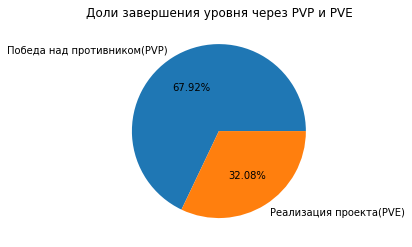

In [39]:
labels = ['Победа над противником(PVP)', 'Реализация проекта(PVE)']
wins = win_types['user_id']

fig1, ax1 = plt.subplots()
ax1.pie(wins, labels = labels, autopct = '%1.2f%%')

plt.title("Доли завершения уровня через PVP и PVE")

plt.show()

Посмотрим сколько и каких зданий строят игроки на первом уровне:

In [40]:
buildings = game_actions.groupby('building_type')['event'].count().reset_index().sort_values(by = 'event', 
                                                                                             ascending = False)
buildings = buildings.rename(columns = {'event':'build_number'})
buildings

,building_type,build_number
2,spaceport,59325
0,assembly_shop,54494
1,research_center,14137


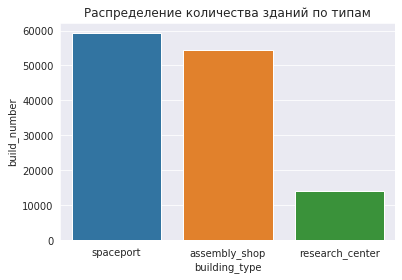

In [41]:
sns.set_style("darkgrid")
ax = sns.barplot(data = buildings, x = 'building_type', y = 'build_number')
plt.title('Распределение количества зданий по типам')
plt.show()

Самое популярное здание - космопорт. Его построили 59 325 раз и лидирует он с небольшим отрывом. На втором месте 54 494 раз построили сборочный цех, ну и замыкает тройку исследовательский центр - 14 137 раз. Теперь посмотрим сколько из них завершили уровень:

In [42]:
finished_user_id = finished_stage_1['user_id']
buildings_finished_lvl = game_actions.query('user_id in @finished_user_id').groupby('building_type')['event'].count().reset_index().sort_values(by = 'event', ascending = False)
buildings_finished_lvl = buildings_finished_lvl.rename(columns = {'event':'build_number'})
buildings_finished_lvl

,building_type,build_number
2,spaceport,27920
0,assembly_shop,25414
1,research_center,7452


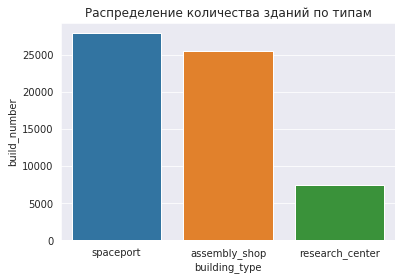

In [43]:
sns.set_style("darkgrid")
ax = sns.barplot(data = buildings_finished_lvl, x = 'building_type', y = 'build_number')
plt.title('Распределение количества зданий по типам')
plt.show()

Динамика та же, на 1 месте космопорт (27920), на 2 месте сборочный цех(25414), на 3 - исследовательский центр(7452). Очевидно, что игроков сильно меньше чем построенных зданий. Значит каждый мог построить одно или больше строений. Посмотрим, сколько же строений построил каждый:

In [44]:
finished_actions = game_actions.query('user_id in @finished_user_id')
finished_buildings = finished_actions.query('event == "building"').groupby('user_id')['event'].count().reset_index()
finished_buildings.columns = ['user_id', 'build_count']
finished_buildings.head()

,user_id,build_count
0,001d39dc-366c-4021-9604-6a3b9ff01e25,8
1,003ee7e8-6356-4286-a715-62f22a18d2a1,8
2,004074f8-251a-4776-922c-8348dca1a2f6,12
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,8
4,0056c007-c082-43cc-bdef-afc49bca4cb9,3


In [45]:
finished_stage_1 = finished_stage_1.merge(finished_buildings, how = 'left', on = 'user_id')
finished_stage_1.head()

,event_datetime,event,building_type,user_id,project_type_x,win_type,build_count
0,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,enemy_defeat,2
1,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,enemy_defeat,2
2,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,enemy_defeat,2
3,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,enemy_defeat,3
4,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,enemy_defeat,2


In [46]:
print("Минимальное количество строений -", finished_stage_1['build_count'].min())

Минимальное количество строений - 2


In [47]:
print("Максимальное количество строений -", finished_stage_1['build_count'].max())

Максимальное количество строений - 20


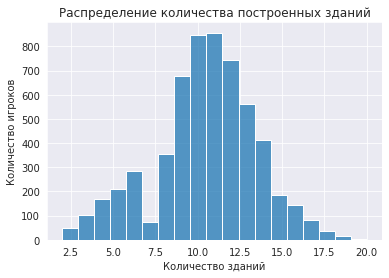

In [48]:
sns.histplot(data = finished_stage_1, x="build_count", bins = 19).set(title = 'Распределение количества построенных зданий', 
                                                                  xlabel='Количество зданий', ylabel='Количество игроков')
plt.show()

In [49]:
print("Среднее количество построенных зданий одним игроком -", buildings_finished_lvl['build_number'].sum() 
      / len(finished_user_id))

Среднее количество построенных зданий одним игроком - 10.449716348633316


В среднем, игроки завершившие 1 уровень строят 10,5 зданий. Так же, мало кто строит 7. Игроки явно испытывают некоторые сложности, на эту особенность стоит обратить разработчикам и геймдизайнерам. 

**Вывод:**

 - Исследовав первую когорту игроков мы можем сделать можно сказать что игроков, заканчивающих уровень через PVP (3951) практически вдвое больше чем игроков заканчивающих PVE (1866);
 - Самое востребованное здание - космопорт (27920), на втором месте сборочный цех (25414), на третьем исследовательский центр (7452);
 - Среднее количество построек среди тех кто завершил 1 уровень - 10,5;
 - 7 построек - роковое число. На этом этапе пользователям что-то не нравится и есть какие-то сложности. Скорее всего у многих на этом количестве построек пропадает интерес или возникает какой-либо другой раздражительный фактор, который сильно влияет на отток. Об этом необходимо оповестить команду разработчиков и геймдизайнеров

## Шаг 4. Проверка статистических гипотез

### 1 гипотеза: о различии времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

Найдем id игроков завершивших уровень победой над врагом и реализовавших проект:

In [50]:
defeat_user_id  = set(finished_stage_1['user_id']) - set(finished_project['user_id'])
project_user_id = finished_project['user_id']

Найдем время первого события для игроков, завершивших первый уровень:

In [51]:
first_event = finished_actions.groupby('user_id')['event_datetime'].min().reset_index()
first_event.columns = ['user_id', 'first_event_time']
first_event.head()

,user_id,first_event_time
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47


In [52]:
finished_stage_1 = finished_stage_1.merge(first_event, on = 'user_id', how = 'left')
finished_stage_1.head()

,event_datetime,event,building_type,user_id,project_type_x,win_type,build_count,first_event_time
0,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,enemy_defeat,2,2020-05-04 00:13:21
1,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,enemy_defeat,2,2020-05-04 00:22:48
2,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,enemy_defeat,2,2020-05-04 13:41:55
3,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,enemy_defeat,3,2020-05-04 00:57:02
4,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,enemy_defeat,2,2020-05-04 19:23:40


Теперь время от первого события до завершения уровня:

In [53]:
finished_stage_1['time_to_finish'] = finished_stage_1['event_datetime'] - finished_stage_1['first_event_time']
finished_stage_1.head()

,event_datetime,event,building_type,user_id,project_type_x,win_type,build_count,first_event_time,time_to_finish
0,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,enemy_defeat,2,2020-05-04 00:13:21,0 days 19:34:08
1,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,enemy_defeat,2,2020-05-04 00:22:48,1 days 12:59:21
2,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,enemy_defeat,2,2020-05-04 13:41:55,1 days 05:12:42
3,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,enemy_defeat,3,2020-05-04 00:57:02,1 days 20:30:27
4,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,enemy_defeat,2,2020-05-04 19:23:40,1 days 10:38:42


Добавим время прохождения уровня в секундах и выделим две группы по которым будем сравнивать:

In [54]:
finished_stage_1['time_to_finish_sec'] = finished_stage_1['time_to_finish'].dt.total_seconds()

In [55]:
finished_def = finished_stage_1.query('user_id in @defeat_user_id')
finished_def.tail()

,event_datetime,event,building_type,user_id,project_type_x,win_type,build_count,first_event_time,time_to_finish,time_to_finish_sec
5810,2020-06-04 06:44:02,finished_stage_1,NaN,18fc6a86-00e7-4f3e-96da-bdb6d550415c,NaN,enemy_defeat,9,2020-05-04 08:45:09,30 days 21:58:53,2671133.0
5812,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN,enemy_defeat,12,2020-05-04 18:38:25,30 days 21:12:13,2668333.0
5814,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,enemy_defeat,12,2020-05-07 07:28:50,28 days 18:56:22,2487382.0
5815,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,enemy_defeat,16,2020-05-07 05:43:45,29 days 06:28:42,2528922.0
5816,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,enemy_defeat,12,2020-05-06 02:56:25,30 days 09:36:24,2626584.0


In [56]:
finished_proj = finished_stage_1.query('user_id in @project_user_id')
finished_proj.head()

,event_datetime,event,building_type,user_id,project_type_x,win_type,build_count,first_event_time,time_to_finish,time_to_finish_sec
118,2020-05-10 02:37:50,finished_stage_1,NaN,9e57e5bb-49f4-4efb-991c-747d7a88e446,NaN,satellite_orbital_assembly,11,2020-05-04 12:13:36,5 days 14:24:14,483854.0
157,2020-05-10 10:30:22,finished_stage_1,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,satellite_orbital_assembly,12,2020-05-04 06:50:30,6 days 03:39:52,531592.0
176,2020-05-10 14:40:04,finished_stage_1,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,NaN,satellite_orbital_assembly,12,2020-05-04 01:42:30,6 days 12:57:34,565054.0
271,2020-05-11 02:10:33,finished_stage_1,NaN,9f63fad6-17b0-493f-938b-8d19e6d6c38c,NaN,satellite_orbital_assembly,15,2020-05-04 06:39:33,6 days 19:31:00,588660.0
334,2020-05-11 08:37:32,finished_stage_1,NaN,ee21905b-ab5a-44c6-9196-e5c9f8fada19,NaN,satellite_orbital_assembly,11,2020-05-04 01:40:19,7 days 06:57:13,629833.0


In [57]:
print(finished_def['time_to_finish'].mean())
print(finished_proj['time_to_finish'].mean())

11 days 02:30:24.076183
13 days 11:00:49.135048


И так, у игроков завершивших уровень реализацией проекта на прохождение уровня уходит 13,5 дней. У одолевших противника на прохождение уровня уходит в среднем 11 дней.

Проверим гипотезу о равенстве средних двух полученных совокупностей.

 - H0: Среднее время прохождения уровня у группы победивших противника и группы завершивших проект не отличается.
 - H1: Среднее время прохождения уровня у группы победивших противника и группы завершивших проект различаются.

In [58]:
# критический уровень статистической значимости
alpha = 0.05
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(finished_def['time_to_finish_sec'], finished_proj['time_to_finish_sec'], equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 7.256845329495443e-98
Отвергаем нулевую гипотезу


Между выборками есть статистически значимая разница

### 2 гипотеза: о разнице в количестве зданий за время прохождения уровня

In [59]:
finished_def = finished_stage_1.query('user_id in @defeat_user_id')
finished_proj = finished_stage_1.query('user_id in @project_user_id')

In [60]:
print("Игроки, завершившие проект, в среднем построили -", finished_def['build_count'].mean())
print("Игроки, победившие другого игрока, в среднем построили -", finished_proj['build_count'].mean())

Игроки, завершившие проект, в среднем построили - 9.411541381928625
Игроки, победившие другого игрока, в среднем построили - 12.64790996784566


Проверим статистическую гипотезу о равенсте средних по количеству построенных зданий между двумя группами.

 - H0: Среднее количество построенных зданий прохождения уровня у группы победивших противника и группы завершивших проект не отличается.
 - H1: Среднее количество построенных зданий прохождения уровня у группы победивших противника и группы завершивших проект различаются.

In [61]:
finished_def['build_count'].astype(float)

0        2.0
1        2.0
2        2.0
3        3.0
4        2.0
        ... 
5810     9.0
5812    12.0
5814    12.0
5815    16.0
5816    12.0
Name: build_count, Length: 3951, dtype: float64

In [62]:
finished_proj['build_count'].astype(float)

118     11.0
157     12.0
176     12.0
271     15.0
334     11.0
        ... 
5804    15.0
5805    13.0
5807    12.0
5811    13.0
5813    13.0
Name: build_count, Length: 1866, dtype: float64

In [63]:
# критический уровень статистической значимости
alpha = 0.05
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(finished_def['build_count'], finished_proj['build_count'], equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0
Отвергаем нулевую гипотезу


В количестве построенных зданий между двумя группами есть статистически значимая разница. Игроки, завершившие уровень реализацией проекта, строят зданий больше 

**Вывод**
 - Проверив первую гипотезу мы убедились что у игроков завершивших уровень через  PVE (13,5 дней)  уходит времени больше, чем у тех кто проходит через PVP (11 дней). Между двумя группами действительно есть значительная статистическая разница по времени прохождения уровня.
 - По второй гипотезе мы убедились что гроки реализовавшие проект, построили больше зданий, чем те кто завершил уровень победой над противником. В среднем при прохождении с проектом 12,6 зданий, при победе над врагом - 9,4 здания.
 

## Шаг 5. Разработка модели монетизации

In [64]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [65]:
cac = ad_costs['cost'].sum()/len(game_actions['user_id'].unique())
print("На привлечение одного пользователья %.2f" %cac)

На привлечение одного пользователья 0.56


Посмотрим на динамику событий по дням:

In [66]:
game_actions['event_date'] = game_actions['event_datetime'].dt.date
game_event_date = game_actions.groupby('event_date')['event'].count()
game_event_date

event_date
2020-05-04     8171
2020-05-05     9055
2020-05-06     9925
2020-05-07    10858
2020-05-08    12059
2020-05-09    13129
2020-05-10    15207
2020-05-11     8185
2020-05-12     7918
2020-05-13     7624
2020-05-14     6830
2020-05-15     5952
2020-05-16     5099
2020-05-17     3955
2020-05-18     2847
2020-05-19     2319
2020-05-20     1837
2020-05-21     1370
2020-05-22      946
2020-05-23      707
2020-05-24      491
2020-05-25      382
2020-05-26      262
2020-05-27      180
2020-05-28      118
2020-05-29       79
2020-05-30       44
2020-05-31       29
2020-06-01       20
2020-06-02       15
2020-06-03       11
2020-06-04       10
2020-06-05        5
Name: event, dtype: int64

Самый пик приходится на 10 мая (15207 событий), после этого идет явный спад. Это говорит о том что основная часть пользователей либо завершила уровень, либо забросили игру. Посмотрим сколько зданий построили игроки: 

In [67]:
buildings = game_actions.query('event == "building"').groupby('user_id')['event'].count().reset_index()
buildings

,user_id,event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8
4,002f508f-67b6-479f-814b-b05f00d4e995,12
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,9
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,9
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,7


In [68]:
print("В среднем игроки построили %.2f" %buildings['event'].mean(), "зданий")

В среднем игроки построили 9.43 зданий


Посчитаем, сколько показов рекламы нужно для покрытия стоимости привлечения одного игрока.
Стоимость одного показа рекламы в нашей игре - 7 центов.

In [69]:
ad_show = 0.07
print("Для окупаемости привлечения одного игрока нужно показать ему рекламу %.0f" %(cac/ad_show), "раз")

Для окупаемости привлечения одного игрока нужно показать ему рекламу 8 раз


In [70]:
buildings['income'] = ((buildings['event'] - 1).clip(0))*ad_show
buildings.head()

,user_id,event,income
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0.84
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,0.56
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0.21
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,0.49
4,002f508f-67b6-479f-814b-b05f00d4e995,12,0.77


In [71]:
income  = buildings['income'].sum()
print("Если показывать рекламу начиная с постройки 2 здания, примерный доход составит - %.1f" %income)

Если показывать рекламу начиная с постройки 2 здания, примерный доход составит - 8006.6


Посчитаем суммарные расходы на привлечение игроков:

In [72]:
cost = ad_costs['cost'].sum()
print("На привлечение игроков потратили %.1f" %cost)

На привлечение игроков потратили 7603.6


Оценим прибыль нашей модели:

In [73]:
total_income = ((income - cost)/cost)*100
print("Наша прибыль - %.1f" %total_income, "%")

Наша прибыль - 5.3 %


Посмотрим что будет если показывать рекламу 6 раз из 7

In [74]:
ad_display_ratio = 6/7
ad_display_total = buildings['event'].sum() * ad_display_ratio * ad_show
print("Маркетинговые расходы составят - %.1f" %ad_display_total)

Маркетинговые расходы составят - 7677.4


При такой модели маркетинговые расходы также окупились. Однако при этой модели многие игроки будут видеть рекламу начиная с первой постройки, некоторым реклама может попадать при каждой постройке здания. Первая модель выглядит предпочтительнее

**Вывод:**

Рекомендуемая модель монетизации: показывать игрокам рекламу при постройке зданий начиная со второго здания.
При такой модели расходы на привлечение игроков первой когорты окупились бы и принесли небольшую прибыль

## Шаг 6. Общие выводы и рекоммендации.

По первой когорте примерно в два раза больше игроков завершают уровень победой над врагом, чем реализацией проекта. 3951 игрок завершил уровень победой над врагом, 1866 - реализацией проекта.

Среди построек на 1 месте космопорт (27920), на 2 месте сборочный цех(25414), на 3 - исследовательский центр(7452). Очевидно, что игроков сильно меньше чем построенных зданий. Значит каждый мог построить одно или больше строений. Игроки, завершившие первый уровень, построили от 2 до 20 зданий, в среднем по 10,5 зданий.

Судя по средним значениям, у игроков, завершивших уровень реализацией проекта, уходит больше времени - 13,5 дней. У одолевших противника на прохождение уровня уходит в среднем 11 дней. По результатам проведения t-етста между двумя группами действительно есть статистически значимая разница во времени прохождения уровня.

Рекомендуемая модель монетизации: показывать игрокам рекламу при постройке зданий начиная со второго здания. При такой модели расходы на привлечение игроков первой когорты окупились бы и принесли прибыль в 5,3%.
Однако для окупаемости рекламу нужно будет показывать практически при каждой постройке здания. Возможно, стоит рассмотреть вариант переноса части показов на другие экраны/события, например показывать рекламу при завершении уровня.

 - Презентация - https://disk.yandex.ru/i/_0c8OOnUrF52Uw
 - Дашборд - https://public.tableau.com/app/profile/sergey3585/viz/SpaceBrothers_16461624333900/sheet0